In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math
from datetime import datetime
from scipy.integrate import solve_ivp


In [2]:
df = pd.read_csv('Documents/Covid/Ourworldindata/owid-covid-data.csv', sep = ',')
df.head(n=6)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89466 entries, 0 to 89465
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               89466 non-null  object 
 1   continent                              84692 non-null  object 
 2   location                               89466 non-null  object 
 3   date                                   89466 non-null  object 
 4   total_cases                            86057 non-null  float64
 5   new_cases                              86055 non-null  float64
 6   new_cases_smoothed                     85054 non-null  float64
 7   total_deaths                           76280 non-null  float64
 8   new_deaths                             76438 non-null  float64
 9   new_deaths_smoothed                    85054 non-null  float64
 10  total_cases_per_million                85593 non-null  float64
 11  ne

In [4]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [5]:
df.groupby(df['date'].dt.strftime('%Y-%m-%d'))['new_cases'].sum().sort_values(ascending=False)

date
2021-01-07    2867056.0
2021-04-28    2852389.0
2021-04-22    2850880.0
2021-04-23    2848692.0
2021-04-21    2823348.0
                ...    
2020-01-19          0.0
2020-01-20          0.0
2020-01-21          0.0
2020-01-22          0.0
2020-01-01          0.0
Name: new_cases, Length: 501, dtype: float64

<AxesSubplot:xlabel='date'>

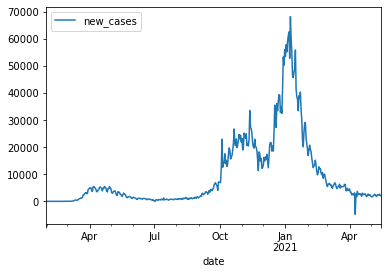

In [6]:
df[df.location == "United Kingdom"].plot(x="date", y="new_cases")

In [7]:
uk_df = df[df.location == "United Kingdom"].copy()
uk_df.head(5)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
84200,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
84201,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
84202,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
84203,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
84204,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932


In [8]:
uk_df["media7dias"] = uk_df["new_cases"].rolling(14).sum()
fity = [0]*len(uk_df["media7dias"])

In [9]:
uk_df.index = range(0, len(uk_df["location"]), 1)
uk_df.tail(1)

for i in range(0, len(uk_df["media7dias"])):
    fity[i] = math.log(uk_df["media7dias"][i])

#len(uk_df["location"])

<AxesSubplot:xlabel='date'>

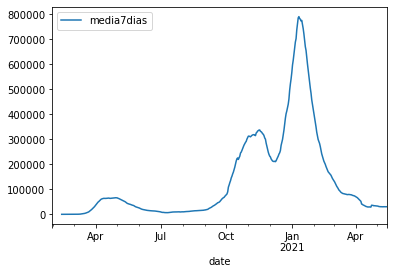

In [10]:
uk_df.plot("date", "media7dias")

[ 0.05651649 12.45416603]
R0 = 1.7912308510428707
[ 0.04114951 13.12293472]
R02 = 1.5760931184594418


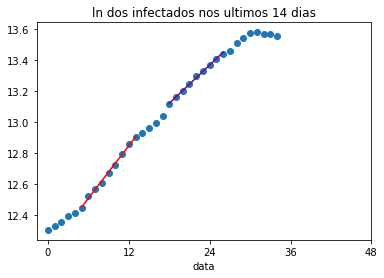

In [11]:
interval = np.linspace(0, 350-315, 350-315, endpoint = False)
plt.scatter(interval, fity[315:350])
plt.title('ln dos infectados nos ultimos 14 dias')
plt.xlabel('data')


y = fity[320:329]
x = np.linspace(0, 329-320, 329-320, endpoint = False)
fit = np.polyfit(x,y,1)
print(fit)
print('R0 =',fit[0]/(1/14)+1)

plt.plot(x+5,np.poly1d(fit)(x),color="red")
z = fity[333:342]
w = np.linspace(0, 342-333, 342-333, endpoint = False)
fit2 = np.polyfit(w,z,1)
print(fit2)
print('R02 =',fit2[0]/(1/14)+1)

plt.plot(w+18,np.poly1d(fit2)(w),color="purple")

plt.xticks(np.arange(0, 60, 12))
plt.savefig('resultados_uk.png')
plt.show()

<AxesSubplot:xlabel='date'>

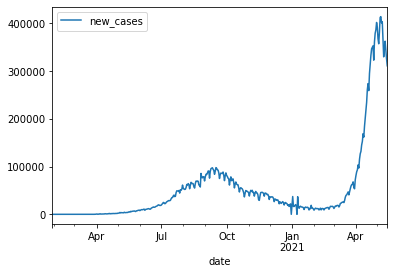

In [12]:
df[df.location == "India"].plot(x="date", y="new_cases")

In [13]:
in_df = df[df.location == "India"].copy()
in_df.dropna()
in_df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
36964,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
36965,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
36966,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
36967,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
36968,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [14]:
in_df["media7dias"] = in_df["new_cases"].rolling(14).sum()
fity2 = [0]*len(in_df["media7dias"])



In [15]:
in_df.index = range(0, len(in_df["location"]), 1)
in_df.tail(1)

for i in range(0, len(in_df["media7dias"])):
    if(in_df["media7dias"][i]>0):
        fity2[i] = math.log(in_df["media7dias"][i])

472


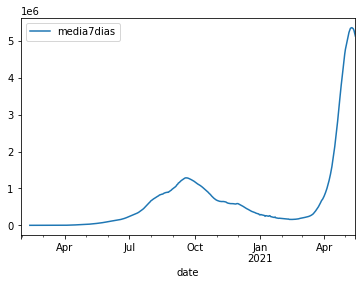

In [16]:
in_df.plot("date", "media7dias")
print(len(fity2))

[ 0.06531481 12.60747616]
R0 = 1.9144073641936157
[ 0.07139666 14.00284461]
R02 = 1.999553217756349


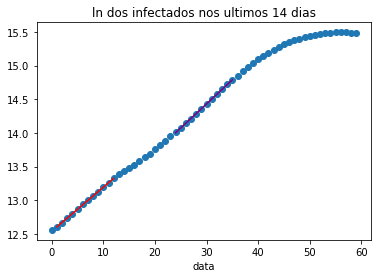

In [17]:
interval = np.linspace(0, 470-410, 470-410, endpoint = False)
plt.scatter(interval, fity2[410:470])
plt.title('ln dos infectados nos ultimos 14 dias')
plt.xlabel('data')


y = fity2[411:423]
x = np.linspace(0, 423-411, 423-411, endpoint = False)
fit = np.polyfit(x,y,1)
print(fit)
print('R0 =',fit[0]/(1/14)+1)

plt.plot(x+1,np.poly1d(fit)(x),color="red")
z = fity2[434:446]
w = np.linspace(0, 446-434, 446-434, endpoint = False)
fit2 = np.polyfit(w,z,1)
print(fit2)
print('R02 =',fit2[0]/(1/14)+1)

plt.plot(w+24,np.poly1d(fit2)(w),color="purple")

#plt.xticks(np.arange(0, 60, 12))
plt.savefig('resultados_in.png')
plt.show()

<AxesSubplot:xlabel='date'>

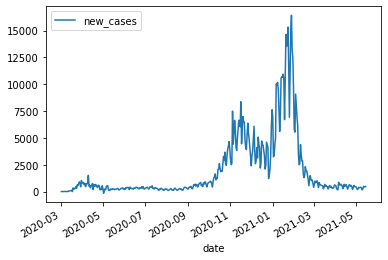

In [18]:
df[df.location == "Portugal"].plot(x="date", y="new_cases")

In [19]:
pt_df = df[df.location == "Portugal"].copy()
pt_df.dropna()
#pt_df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index


In [20]:
pt_df["media7dias"] = pt_df["new_cases"].rolling(14).sum()
fity2 = [0]*len(pt_df["media7dias"])

In [21]:
pt_df.index = range(0, len(pt_df["location"]), 1)
pt_df.tail(1)

for i in range(0, len(pt_df["media7dias"])):
    if(pt_df["media7dias"][i]>0):
        fity2[i] = math.log(pt_df["media7dias"][i])

445


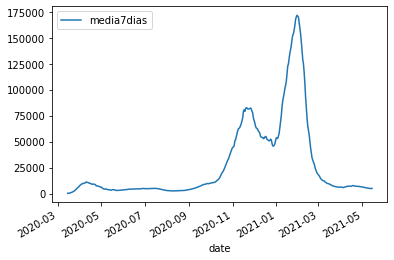

In [22]:
pt_df.plot("date", "media7dias")
print(len(fity2))

[ 0.08919202 10.96497603]
R0 = 2.2486883132399025
[ 0.03857981 11.39972824]
R02 = 1.5401172756016517
[ 0.03251273 11.74163   ]
R02 = 1.4551781967734245


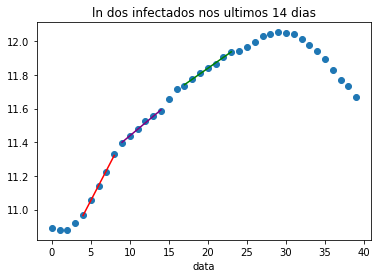

In [43]:
interval = np.linspace(0, 350-310, 350-310, endpoint = False)
plt.scatter(interval, fity2[310:350])
plt.title('ln dos infectados nos ultimos 14 dias')
plt.xlabel('data')


y = fity2[314:319]
x = np.linspace(0, 319-314, 319-314, endpoint = False)
fit = np.polyfit(x,y,1)
print(fit)
print('R0 =',fit[0]/(1/14)+1)
plt.plot(x+4,np.poly1d(fit)(x),color="red")

z = fity2[319:325]
w = np.linspace(0, 325-319, 325-319, endpoint = False)
fit2 = np.polyfit(w,z,1)
print(fit2)
print('R02 =',fit2[0]/(1/14)+1)
plt.plot(w+9,np.poly1d(fit2)(w),color="purple")

z = fity2[327:334]
w = np.linspace(0, 334-327, 334-327, endpoint = False)
fit2 = np.polyfit(w,z,1)
print(fit2)
print('R02 =',fit2[0]/(1/14)+1)
plt.plot(w+17,np.poly1d(fit2)(w),color="green")


#plt.xticks(np.arange(0, 60, 12))
plt.savefig('resultados_pt.png')
plt.show()

<AxesSubplot:xlabel='date'>

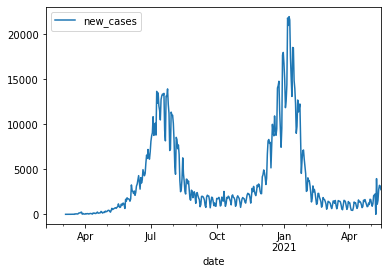

In [24]:
df[df.location == "South Africa"].plot(x="date", y="new_cases")

In [25]:
sa_df = df[df.location == "South Africa"].copy()
sa_df.dropna()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index


In [49]:
sa_df["media7dias"] = sa_df["new_cases"].rolling(14).sum()
fity2 = [0]*len(sa_df["media7dias"])

In [50]:
sa_df.index = range(0, len(sa_df["location"]), 1)
sa_df.tail(1)

for i in range(0, len(sa_df["media7dias"])):
    if(sa_df["media7dias"][i]>0):
        fity2[i] = math.log(sa_df["media7dias"][i])

464


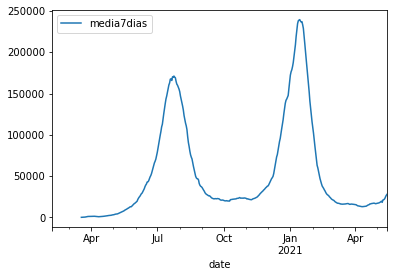

In [51]:
sa_df.plot("date", "media7dias")
print(len(fity2))

[ 0.07893374 10.80991711]
R0 = 2.10507230923072
[ 0.05239879 11.31804043]
R02 = 1.7335830413038682


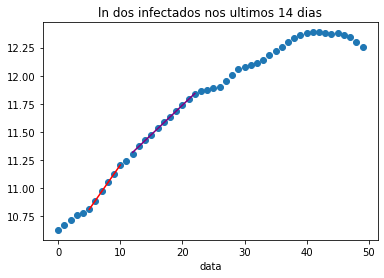

In [56]:
interval = np.linspace(0, 350-300, 350-300, endpoint = False)
plt.scatter(interval, fity2[300:350])
plt.title('ln dos infectados nos ultimos 14 dias')
plt.xlabel('data')


y = fity2[305:311]
x = np.linspace(0, 311-305, 311-305, endpoint = False)
fit = np.polyfit(x,y,1)
print(fit)
print('R0 =',fit[0]/(1/14)+1)
plt.plot(x+5,np.poly1d(fit)(x),color="red")

z = fity2[312:323]
w = np.linspace(0, 323-312, 323-312, endpoint = False)
fit2 = np.polyfit(w,z,1)
print(fit2)
print('R02 =',fit2[0]/(1/14)+1)
plt.plot(w+12,np.poly1d(fit2)(w),color="purple")

#z = fity2[327:334]
#w = np.linspace(0, 334-327, 334-327, endpoint = False)
#fit2 = np.polyfit(w,z,1)
#print(fit2)
#print('R02 =',fit2[0]/(1/14)+1)
#plt.plot(w+17,np.poly1d(fit2)(w),color="green")


#plt.xticks(np.arange(0, 60, 12))
plt.savefig('resultados_sa.png')
plt.show()